#### Steps to be followed
#### 1. Understanding the data
#### 2. Preparation - Test-Train, Scaling
#### 3. Training Dataset
#### 4. Residual Analysis
#### 5. Prediction and model evaluation

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [183]:
# Importing the Dataset
daily = pd.read_csv("day.csv")
daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [184]:
# Dataset details
daily.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [185]:
daily.shape

# There are 730 rows with 16 variables

(730, 16)

In [186]:
# Check for null values and datatypes
daily.info()

# There are no null columns or null values in the dataset
# All columns are either int or float except for dtedat. 
# However, month and year columns are already extracted so this column might not be required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


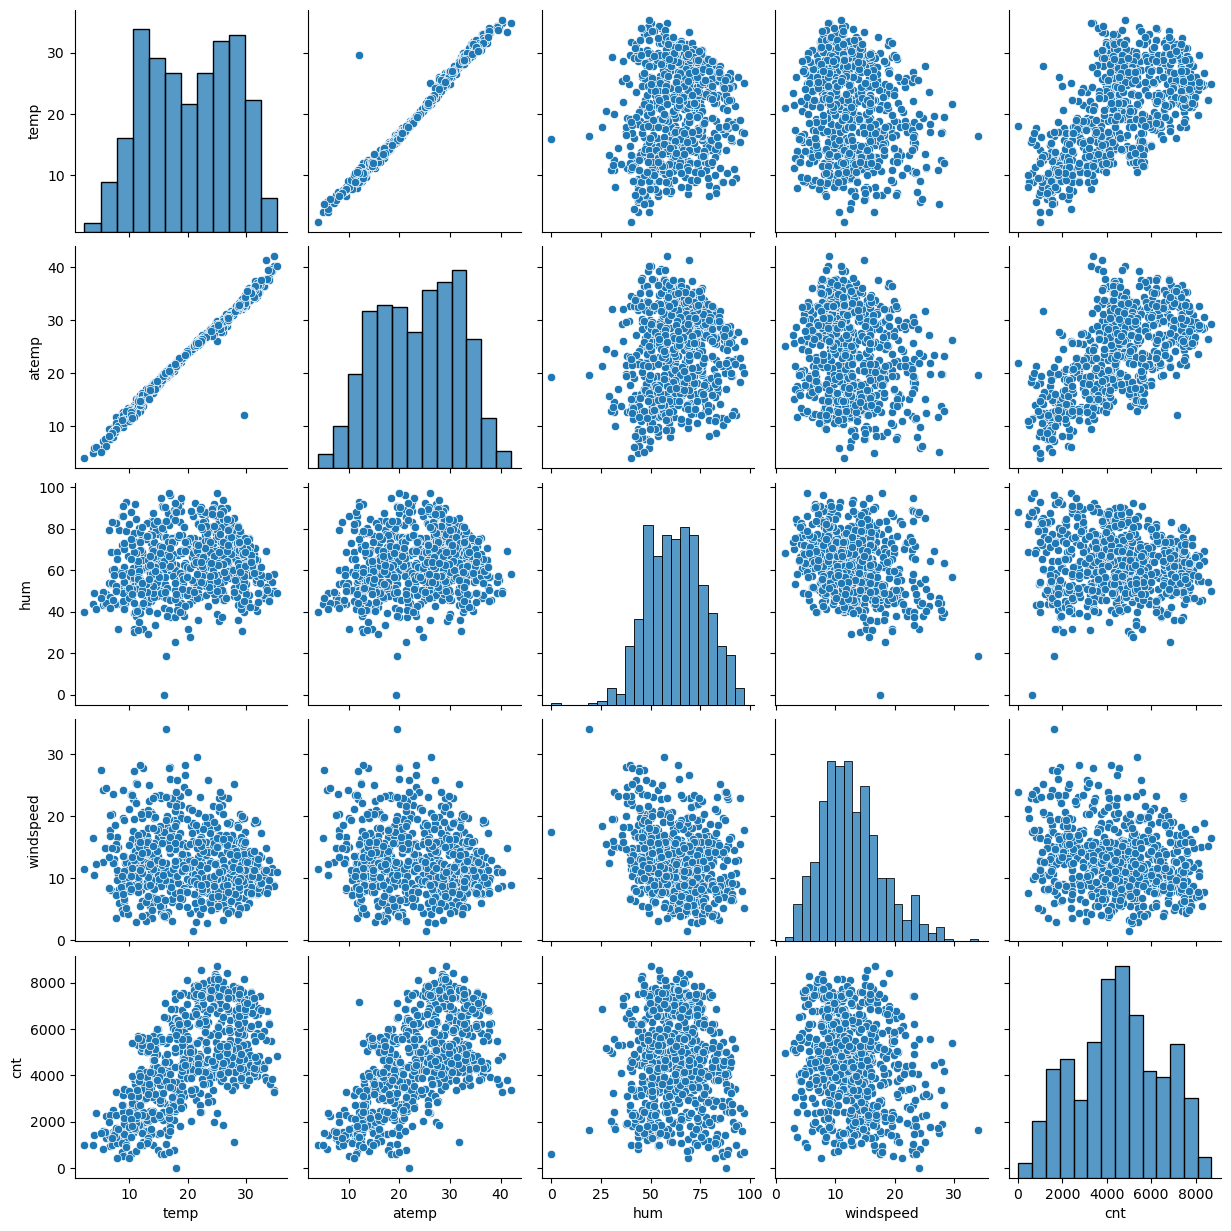

In [222]:
# Pairplot to understand relationships between variables
sb.pairplot(data=daily,vars=['temp','atemp','hum','windspeed','cnt'])
plt.show()

<Axes: xlabel='weathersit', ylabel='cnt'>

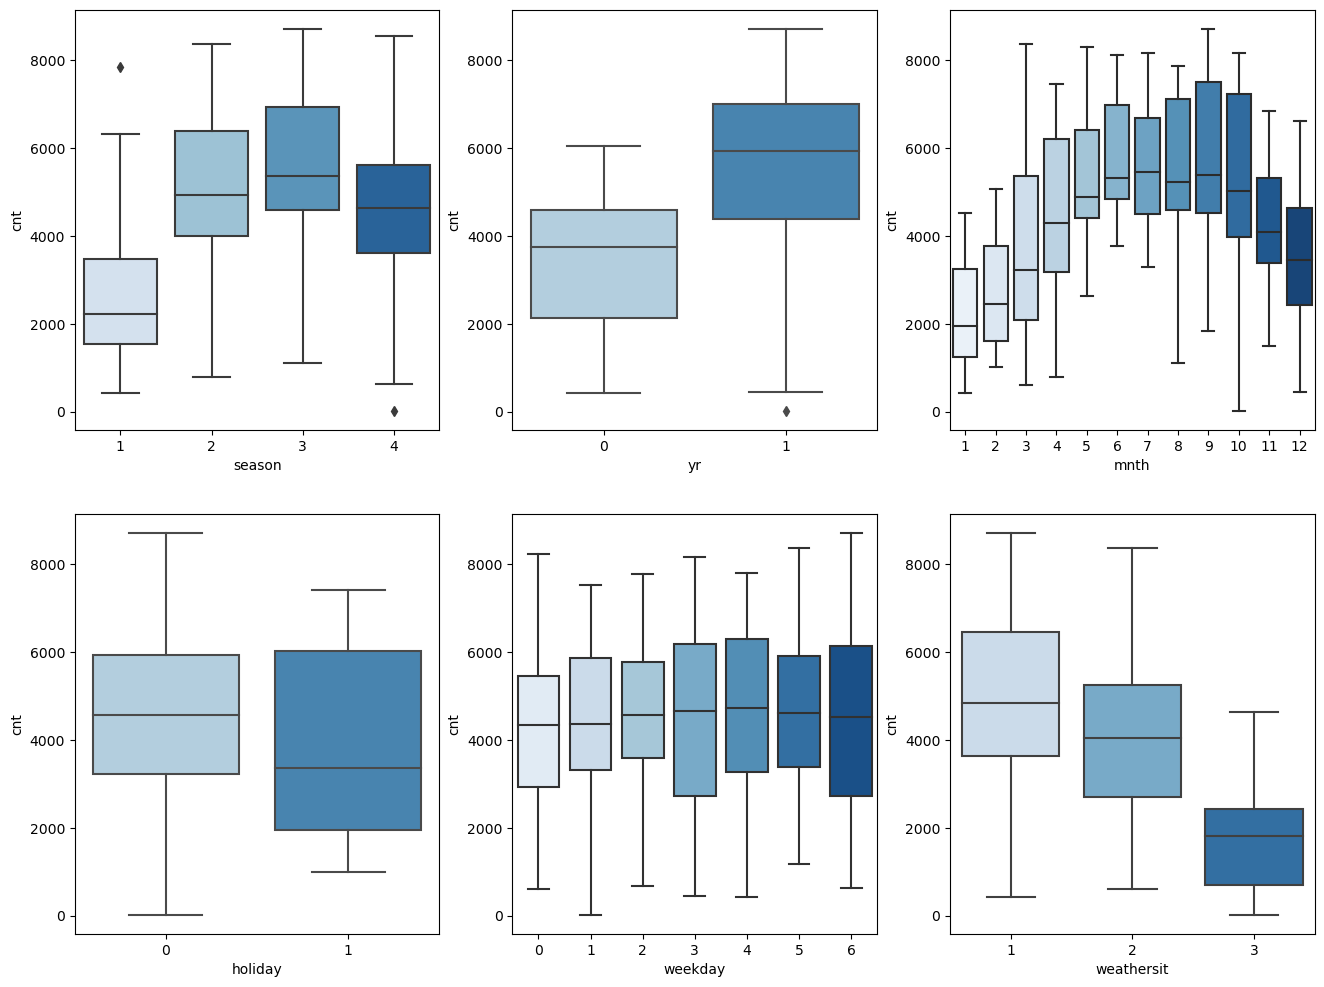

In [187]:
# Visualizing Categorical Variables
plt.figure(figsize=(16,12))

plt.subplot(2,3,1)
sb.boxplot(x='season', y='cnt', data=daily, palette="Blues")

plt.subplot(2,3,2)
sb.boxplot(x='yr', y='cnt', data=daily, palette="Blues")

plt.subplot(2,3,3)
sb.boxplot(x='mnth', y='cnt', data=daily, palette="Blues")

plt.subplot(2,3,4)
sb.boxplot(x='holiday', y='cnt', data=daily, palette="Blues")

plt.subplot(2,3,5)
sb.boxplot(x='weekday', y='cnt', data=daily, palette="Blues")

plt.subplot(2,3,6)
sb.boxplot(x='weathersit', y='cnt', data=daily, palette="Blues")

#plt.subplot(2,3,6)
#sb.boxplot(x='airconditioning', y='cnt', data=housing)

# Findings
# 1. Season: Summer, Fall seasons have the highest rides compared to Spring and winter with Spring being significantly lower (less than half of other seasons)
# 2. Year: There is an increase in rides in 2019 compared to 2018, would be mostly due to increase in market capture
# 3. month: There is a visible trend across months which is inline with season. There is a chance of high collinearity between these 2 variables. We shoudl also check if teh same monthly trend is followed in both the years
# 4. Holiday: there is a slight trend across higher rides on non-holidays
# 5. Weekdays: There is a slight trend across days of the week but not highly significant
# 6. Weather: Highest rides are on clear sky days (1) followed by slight cloudy (2) and further drops with rains/snow (3)

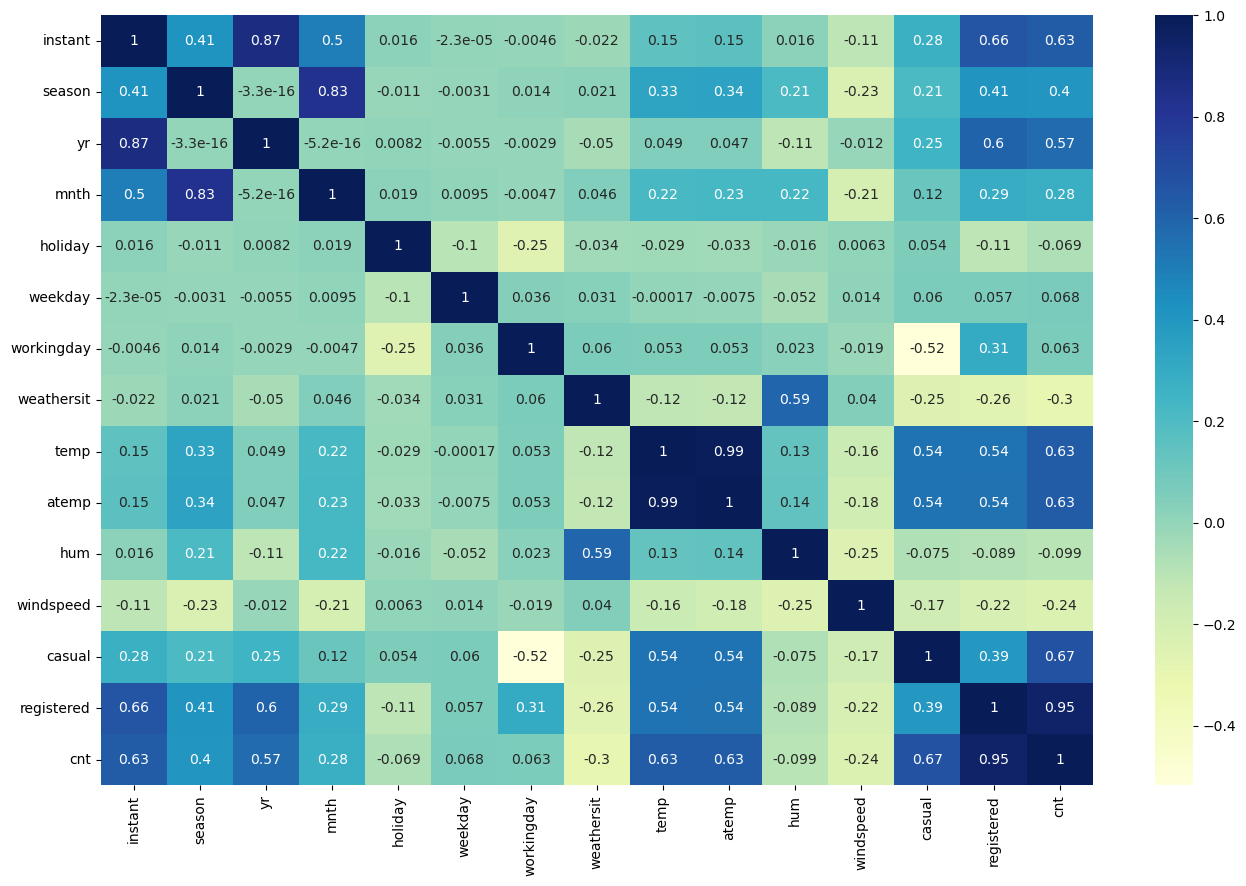

In [188]:
# Correlation heatmap
plt.figure(figsize= (16,10))
sb.heatmap(daily.corr(), annot=True, cmap = "YlGnBu")
plt.show()

### Preparing Data for modelling

1. All Categorical Variables are already encoded and hence no encoding is required
2. Scaling of Temp, aTeamp, humidity, windspeed, casual, registered, cnt will be required post test train split. Along with this we will have to scale variables that have more than 2 values
3. There are metrics like date, instant which logically dont make sense to be kept for modelling (Year month already exist and instant is a unique identifier)
4. Assumming casual and registered users would be overal universe, hence a derived metric of % casual or % regisered should be enough

In [189]:
# Dropping instant and date column from modelling dataset
daily_clean = daily.drop(['instant','dteday'], axis = 1)
daily_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [190]:
# Creating a new Variable perc_registered
daily_clean["perc_registered"] = daily_clean["registered"]/(daily_clean["registered"]+daily_clean["casual"])

# Dropping Casual and Registered column as we have already created a derived column
daily_clean = daily_clean.drop(['casual','registered'], axis = 1)
daily_clean.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,perc_registered
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0.663959
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,0.836454
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0.911045
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0.930858
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0.948750


### Creating Dummy Variables

In [191]:
# Check unique values in each colum
daily_clean.T.apply(lambda x: x.nunique(), axis=1)

season               4
yr                   2
mnth                12
holiday              2
weekday              7
workingday           2
weathersit           3
temp               498
atemp              689
hum                594
windspeed          649
cnt                695
perc_registered    728
dtype: int64

In [192]:
# Converting to category data type
daily_clean['season']=daily_clean['season'].astype('category')
daily_clean['mnth']=daily_clean['mnth'].astype('category')
daily_clean['weekday']=daily_clean['weekday'].astype('category')
daily_clean['weathersit']=daily_clean['weathersit'].astype('category')
daily_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   season           730 non-null    category
 1   yr               730 non-null    int64   
 2   mnth             730 non-null    category
 3   holiday          730 non-null    int64   
 4   weekday          730 non-null    category
 5   workingday       730 non-null    int64   
 6   weathersit       730 non-null    category
 7   temp             730 non-null    float64 
 8   atemp            730 non-null    float64 
 9   hum              730 non-null    float64 
 10  windspeed        730 non-null    float64 
 11  cnt              730 non-null    int64   
 12  perc_registered  730 non-null    float64 
dtypes: category(4), float64(5), int64(4)
memory usage: 55.4 KB


In [193]:
# Create dummies for all category columns and drop 1 column as n-1 columns will be enough to capture whole info
daily_clean = pd.get_dummies(daily_clean, drop_first=True)
daily_clean.info()

# Outcome
# Now we have 31 columns with all categorical variables converted to dummy variables
# A new dervied column i.e. perc_registered defined as % registered users on any given day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   perc_registered  730 non-null    float64
 9   season_2         730 non-null    uint8  
 10  season_3         730 non-null    uint8  
 11  season_4         730 non-null    uint8  
 12  mnth_2           730 non-null    uint8  
 13  mnth_3           730 non-null    uint8  
 14  mnth_4           730 non-null    uint8  
 15  mnth_5           730 non-null    uint8  
 16  mnth_6           730 non-null    uint8  
 17  mnth_7          

### Test train Splitting of dataset

In [311]:
# Keeping 80% data in Train data set
df_train, df_test = train_test_split(daily_clean, train_size = 0.70, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 31)
(220, 31)


### Scaling of Variables - using min-max scaler
Min-Max Scaling: (x - xmin)/(xmax - xmin) 


In [312]:
# Object initiatiion
scaler = MinMaxScaler()

# List of numeric variables
var = ['temp','atemp','hum','windspeed','perc_registered','cnt']

# Scaling of variables
df_train[var] = scaler.fit_transform(df_train[var])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,perc_registered,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0.756673,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0.553566,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0.618834,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0.492653,1,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0.814960,1,...,0,0,0,0,0,0,1,0,1,0


In [313]:
# Check min max values for scaled columns
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,perc_registered,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.675377,0.247059,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.345098,0.029412
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.214947,0.431725,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.475867,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.588181,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.727774,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.827093,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Training

In [314]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

In [315]:
X_train.shape

(510, 30)

In [316]:
# With top variables that have highest correlation i.e. perc_registered, year
# Add Constant
X_train_sm = sm.add_constant(X_train[['perc_registered','yr']])

# Create model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     197.5
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           3.65e-64
Time:                        23:56:11   Log-Likelihood:                 185.83
No. Observations:                 510   AIC:                            -365.7
Df Residuals:                     507   BIC:                            -353.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5847      0.025     23.003      0.000       0.535       0.635
perc_registered    -0.3106      0.035     -8.919      0.000      -0.379      -0.242
yr                  0.2728      0.015     18.243      0.000       0.243       0.302
==============================================================================
Omnibus:                       27.901   Durbin-Watson:                   1.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.596
Skew:                          -0.608   Prob(JB):                     1.38e-07
Kurtosis:                       2.910   Cond. No.                         7.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### RFE
We will be using Recursive Feature Elimination from sklearn

In [317]:
# Fitting Linear Regression Model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE on variables, selecting top 10 features
rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [318]:
# Checking RFE for variables
rfe_array = np.array([X_train.columns,rfe.support_,rfe.ranking_])
rfe_df=pd.DataFrame(data=[rfe_array[0],rfe_array[1],rfe_array[2]]).T
rfe_df.columns=['Variable','Support','Ranking']
rfe_df.sort_values(by=['Support','Ranking'])

,Variable,Support,Ranking
14,mnth_5,False,2
4,atemp,False,3
15,mnth_6,False,4
24,weekday_3,False,5
26,weekday_5,False,6
25,weekday_4,False,7
23,weekday_2,False,8
22,weekday_1,False,9
19,mnth_10,False,10
13,mnth_4,False,11


In [319]:
# Choose all top ranked features from RFE and store into a list
var_rfe1 = rfe_df[rfe_df['Ranking'] == 1]
var_rfe1.Variable.to_list()

['yr',
 'holiday',
 'workingday',
 'temp',
 'hum',
 'windspeed',
 'perc_registered',
 'season_2',
 'season_3',
 'season_4',
 'mnth_8',
 'mnth_9',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

### VIF: Varicance Inflation Factor

In [320]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
25,weekday_4,inf
2,workingday,inf
24,weekday_3,inf
23,weekday_2,inf
22,weekday_1,inf
26,weekday_5,inf
1,holiday,inf
3,temp,450.95
4,atemp,383.34
7,perc_registered,37.89


### Collinearity check with teh selected features post RFE

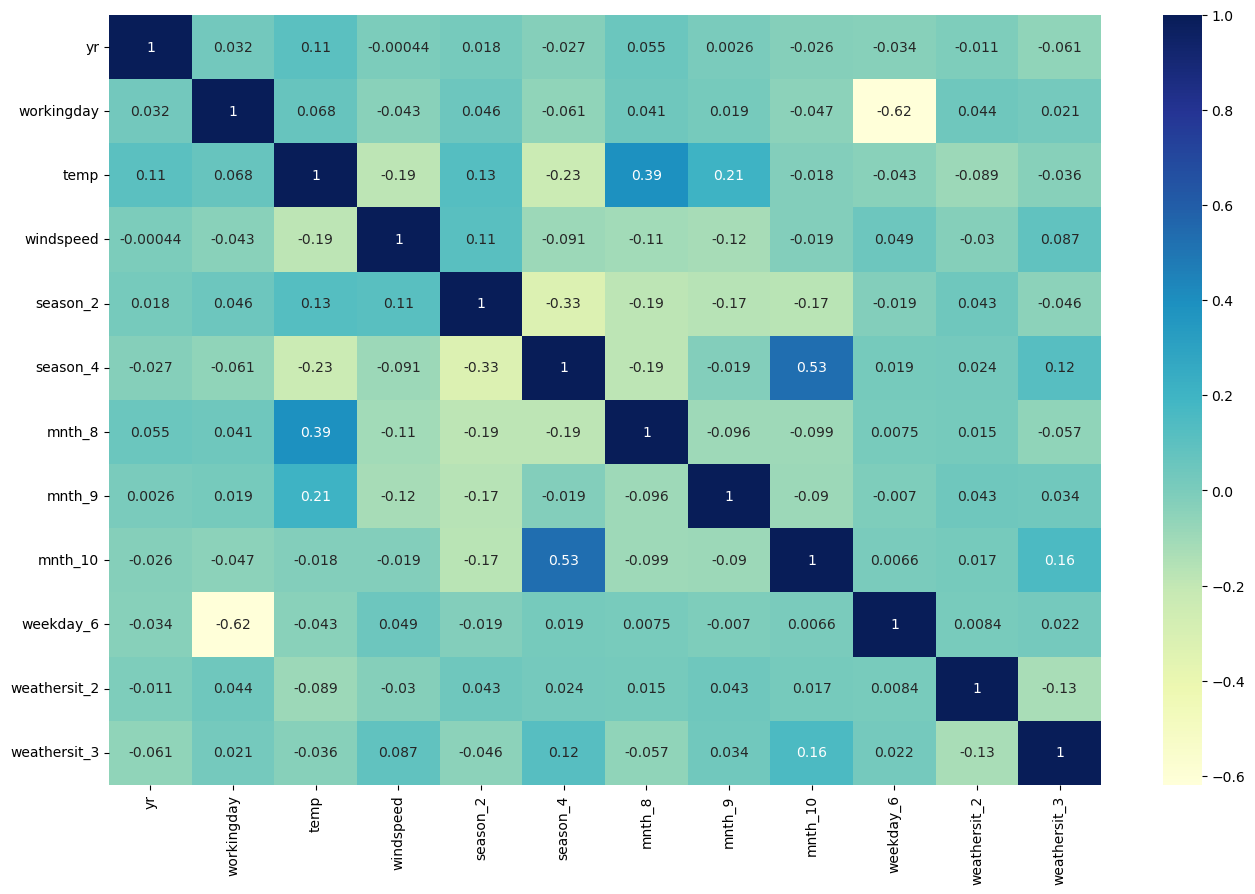

In [321]:
# Correlation heatmap
plt.figure(figsize= (16,10))
sb.heatmap(X_train[['yr',
 #'holiday',
 'workingday',
 'temp',
 #'hum',
 'windspeed',
 #'perc_registered',
 'season_2',
 #'season_3',
 'season_4',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']].corr(), annot=True, cmap = "YlGnBu")
plt.show()

### Model Fitting with selected features from RFE

In [327]:
# With all variables
# Add Constant
#X_train_sm = sm.add_constant(X_train.drop('atemp', axis = 1))
X_train_sm = sm.add_constant(X_train[['yr',
 #'holiday',
 'workingday',
 'temp',
 #'hum',
 'windspeed',
 #'perc_registered',
 'season_2',
 #'season_3',
 'season_4',
 #'mnth_8',
 'mnth_9',
 #'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']])


# Create model
lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Wed, 15 Nov 2023   Prob (F-statistic):          3.13e-188
Time:                        23:58:19   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0750      0.019      4.031      0.000       0.038       0.112
yr               0.2331      0.008     28.370      0.000       0.217       0.249
workingday       0.0561      0.011      5.024      0.000       0.034       0.078
temp             0.5499      0.020     27.861      0.000       0.511       0.589
windspeed       -0.1552      0.025     -6.195      0.000      -0.204      -0.106
season_2         0.0886      0.010      8.608      0.000       0.068       0.109
season_4         0.1307      0.010     12.600      0.000       0.110       0.151
mnth_9           0.0974      0.016      6.184      0.000       0.066       0.128
weekday_6        0.0675      0.014      4.693      0.000       0.039       0.096
weathersit_2    -0.0800      0.009     -9.143      0.000      -0.097      -0.063
weathersit_3    -0.2871      0.025    -11.611      0.000      -0.336      -0.239
==============================================================================
Omnibus:                       68.639   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.839
Skew:                          -0.731   Prob(JB):                     1.07e-33
Kurtosis:                       5.238   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF with the final set of features for sequential elimination based on if VIF > 5

In [328]:
vif = pd.DataFrame()
X_train1 = X_train[['yr',
 #'holiday',
 'workingday',
 'temp',
 #'hum',
 'windspeed',
 #'perc_registered',
 'season_2',
 #'season_3',
 'season_4',
 #'mnth_8',
 'mnth_9',
 #'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']]
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,yr,2.02
7,weekday_6,1.69
4,season_2,1.57
8,weathersit_2,1.53
5,season_4,1.40
6,mnth_9,1.20
9,weathersit_3,1.08


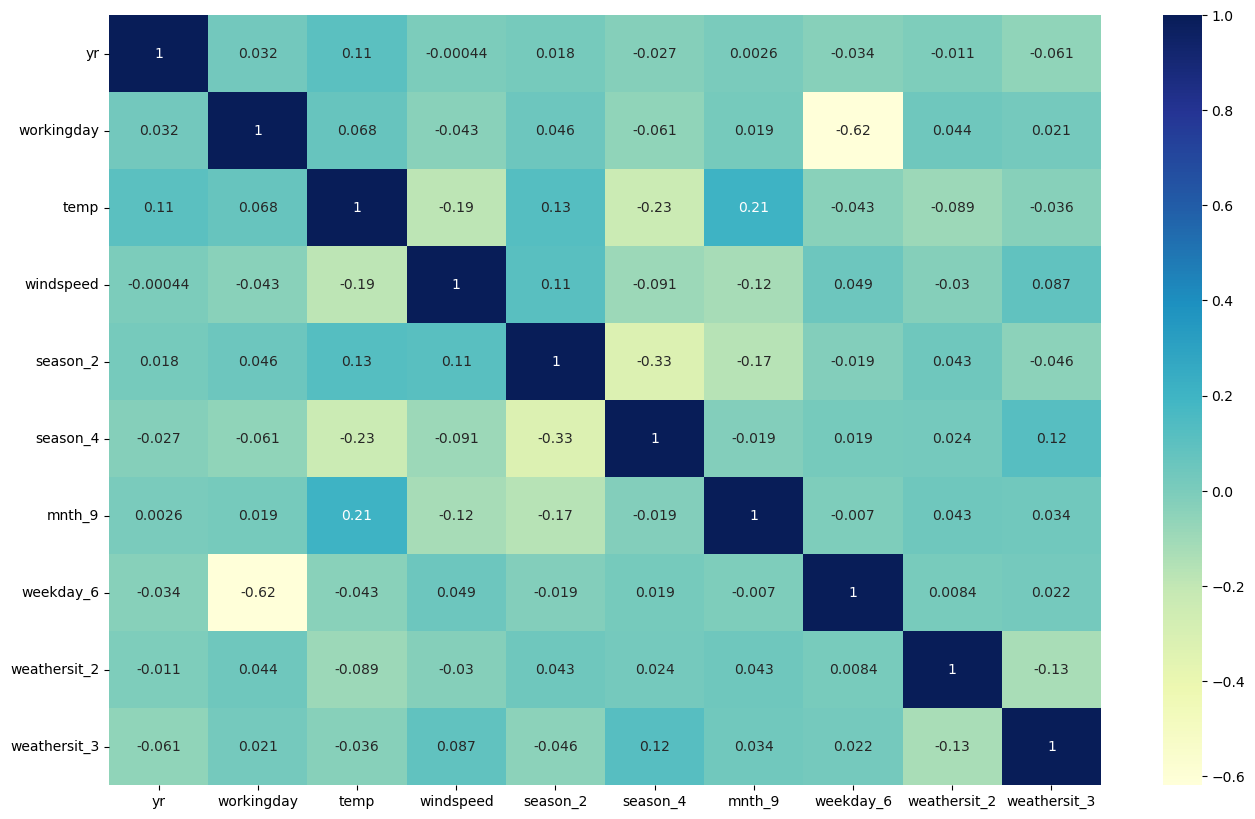

In [331]:
# Correlation heatmap
plt.figure(figsize= (16,10))
sb.heatmap(X_train[['yr',
 #'holiday',
 'workingday',
 'temp',
 #'hum',
 'windspeed',
 #'perc_registered',
 'season_2',
 #'season_3',
 'season_4',
 #'mnth_8',
 'mnth_9',
 #'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']].corr(), annot=True, cmap = "YlGnBu")
plt.show()

### Residual Analysis

<Axes: ylabel='Density'>

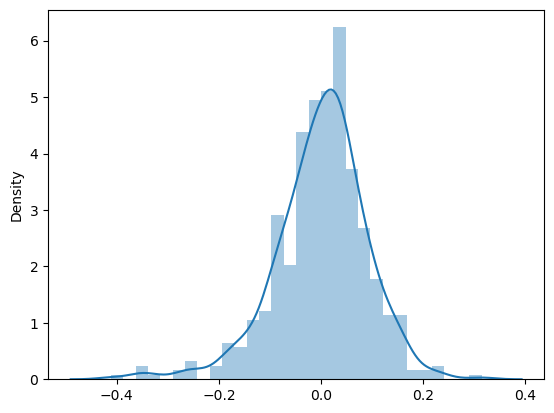

In [332]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train - y_train_pred
sb.distplot(res)

# Findings
# The residuals follow an almost normal distributed curve centered at 0

### Evaluation on Test Set

Scaling needs to be done on Test set. You fit the scaler on Training dataset and scale test dataset using transform

In [333]:
# Create list of numeric variables
var = ['temp','atemp','hum','windspeed','perc_registered','cnt']

# Implement on Data (Read about fit(), transform() and fit_transform())
df_test[var] = scaler.transform(df_test[var])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,perc_registered,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0.006287,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0.744102,1,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0.844951,0,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0.654508,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0.728509,1,...,0,0,0,0,0,1,0,0,0,0


In [334]:
# X_test, y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [335]:
# Add Constant
X_test_sm = sm.add_constant(X_test)

In [336]:
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,perc_registered,season_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0.006287,0,...,0,0,1,0,0,0,0,0,1,0
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.744102,1,...,0,0,0,0,1,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.496145,0.837699,0.334206,0.844951,0,...,0,0,0,0,0,1,0,0,1,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.654508,0,...,0,0,0,0,1,0,0,0,0,0
152,1.0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.728509,1,...,0,0,0,0,0,1,0,0,0,0


In [337]:
# Drop the variables similar to the Final Training model
X_test_sm1 = X_test_sm[['const','yr',
 #'holiday',
 'workingday',
 'temp',
 #'hum',
 'windspeed',
 #'perc_registered',
 'season_2',
 #'season_3',
 'season_4',
 #'mnth_8',
 'mnth_9',
 #'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']]

In [338]:
# Predict model
y_test_pred = lr_model.predict(X_test_sm1)

In [339]:
# Evaluate
r2_score(y_true= y_test, y_pred= y_test_pred)

0.7961390438459766

In [340]:
## Getting the coefficients of the final variables
round(lr_model.params,4)

const           0.0750
yr              0.2331
workingday      0.0561
temp            0.5499
windspeed      -0.1552
season_2        0.0886
season_4        0.1307
mnth_9          0.0974
weekday_6       0.0675
weathersit_2   -0.0800
weathersit_3   -0.2871
dtype: float64

##### The equation of the best fitted line is:

cnt = 0.075 + 0.233*yr + 0.0561*workingday + 0.55*temp - 0.15*windspeed + 0.08*season_2 + 0.13*season_4 + 0.97*weekday_6 - 0.08*weathersit_2 - 0.287*weathersit_3

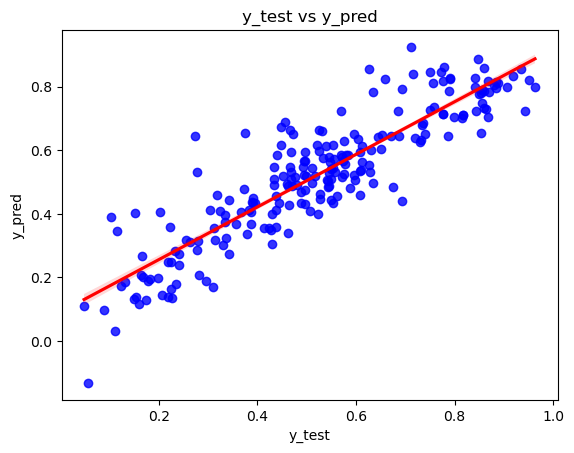

In [344]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sb.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()